In [1]:
from audio_helper import load_and_resample_audio,save_altered_audio
from audio_helper import generate_spectrogram,plot_spectrograms
from audio_analysis import AudioAnalyzer
import os

In [2]:
file_path = 'Audio_Glasslink.mp3'  # Update this to your audio file path
sample_rate = 44100  # Desired sample rate
duration = 15

waveform, sr = load_and_resample_audio(file_path, sample_rate)
waveform = waveform[:, :sample_rate * duration]

# Define alterations to apply
alterations = {
    'minor_alter': 'minor',
    'moderate_alter': 'moderate',
    'strong_alter': 'strong',
    'original_cropped': 'original'
}

# Apply alterations and save audio files
os.makedirs('data/altered_audio', exist_ok=True)
save_altered_audio(alterations, waveform, sample_rate)

Doing minor_alter
Doing moderate_alter
Doing strong_alter
Doing original_cropped


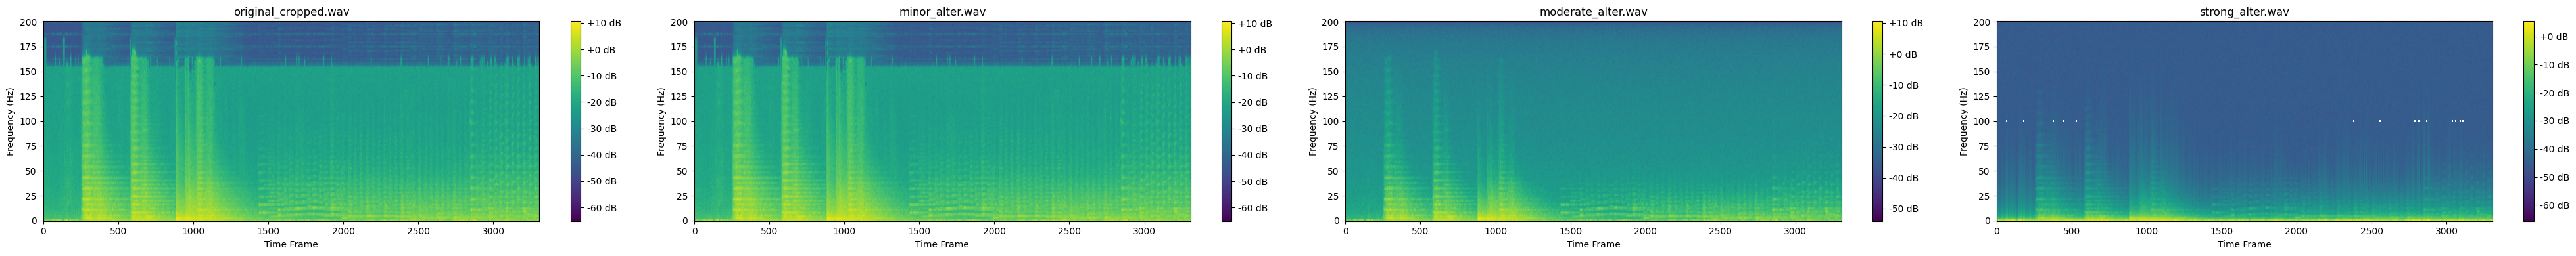

In [3]:
file_paths = ['data/altered_audio/original_cropped.wav', 
              'data/altered_audio/minor_alter.wav', 
              'data/altered_audio/moderate_alter.wav', 
              'data/altered_audio/strong_alter.wav']  
# Update with actual file paths
spectrograms = []
sample_rates = []
titles = []

# Generate spectrograms
for file_path in file_paths:
    spectrogram, sample_rate = generate_spectrogram(file_path)
    titles.append(file_path.split('/')[-1])  
    spectrograms.append(spectrogram)
    sample_rates.append(sample_rate)

plot_spectrograms(spectrograms, sample_rates, titles)


Based on the  the audio alterations and the spectrograms, here are the observations:

- **Minor Alteration:** The spectrogram slight increase in bass frequencies, which could explain why the lower frequencies in the spectrogram for 'minor_alter.wav' appear more prominent compared to the original, without significant loss in high frequencies.

- **Moderate Alteration:** The introduction of noise and a bandpass filter from 20 to 1000 Hz in the 'moderate' alteration would result in the attenuation of frequencies outside the 20-1000 Hz range. This aligns with the reduced intensity of higher frequencies observed in the 'moderate_alter.wav' spectrogram.

- **Strong Alteration:** The application of a lowpass filter with a cutoff frequency of 50 Hz for the 'strong' alteration would drastically reduce most of the audio content above 50 Hz, which is consistent with the 'strong_alter.wav' spectrogram showing very little energy beyond the lowest frequencies.

- **Harmonic Content:** The minor alteration would maintain most of the harmonic content, while the moderate and strong alterations would progressively attenuate or remove harmonics, particularly the upper harmonics, which is evident in the spectrograms.

- **Temporal Structure:** Given that the code does not apply any time-domain effects that would alter the temporal structure, such as time-stretching, the consistency in timing across the spectrograms is expected.

- **Dynamic Range:** The dynamic range of the audio seems to be preserved in the 'minor' alteration but is likely compressed in the 'moderate' and 'strong' alterations due to the addition of noise and filtering, which is visible in the spectrogram's color intensity.

These observations correlate with the expected outcomes of the audio processing described in the code, with each alteration step introducing changes that are consistent with the visual patterns observed in the spectrograms.

## Spectrogram Comparison and Scoring System

| Metric                | Higher/Lower is Better | Pros                                                                                      | Cons                                                                                        | Critical Insights for Audio |
|-----------------------|------------------------|-------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|-----------------------------|
| MSE (Mean Squared Error) | Lower is better        | Simple to compute; directly quantifiable error.                                           | Can be sensitive to outliers; does not account for human perception.                        | Useful for precise error measurement in audio editing or restoration tasks. |
| PSNR (Peak Signal-to-Noise Ratio) | Higher is better       | Provides a measure of peak error; widely used in image/audio quality assessment.          | May not align well with perceived quality for drastically different content types.          | Effective for evaluating noise reduction and signal enhancement in audio processing. |
| SSIM (Structural Similarity Index) | Higher is better       | Accounts for perceptual factors; better aligned with human vision sensitivity.            | More complex to compute; may require tuning of parameters for best results.                 | Reflects perceptual quality of audio; especially useful in lossy compression analysis. |
| Cosine Similarity      | Higher is better       | Measures similarity in pattern regardless of magnitude; good for pattern matching.        | Does not quantify the magnitude of difference; insensitive to scale.                        | Best for comparing the directional similarity of spectral patterns, indicating similar audio content or material. |
| KL Divergence (Kullback-Leibler Divergence) | Lower is better        | Measures the difference between two probability distributions; good for statistical analysis. | Not symmetric (KL(A\|\|B) ≠ KL(B\|\|A)); can be infinite if distributions do not overlap.   | Useful in genre classification or music information retrieval, where distribution of spectral features matters. |
| Histogram Correlation  | Higher is better       | Easy to understand; measures overall distribution similarity.                              | Does not account for spatial relationships or localized patterns.                           | Can help in identifying audio files with similar energy distributions across frequencies, aiding in genre or mood classification. |

These insights provide a more nuanced view of how each metric can be applied to audio spectrograms, highlighting their practical utility in various audio analysis and processing contexts.

In [5]:
# Example usage:
file_paths = ['data/altered_audio/original_cropped.wav', 
              'data/altered_audio/minor_alter.wav', 
              'data/altered_audio/moderate_alter.wav', 
              'data/altered_audio/strong_alter.wav']

analyzer = AudioAnalyzer(file_paths)
analyzer.generate_spectrograms()
analyzer.populate_metrics_dataframe()
analyzer.df_metrics

,Audio Name,MSE,PSNR,SSIM,Cosine Similarity,KL Divergence,Histogram Correlation
0,original_cropped.wav,0.000000,inf,1.000000,1.000000,0.000000,1.0
1,minor_alter.wav,0.117832,73.329210,0.999990,0.999543,0.002205,1.0
2,moderate_alter.wav,0.368868,68.373117,0.999543,0.995653,0.072102,1.0
3,strong_alter.wav,32.170994,48.967185,0.984013,0.160367,4.253512,1.0


The table presents various audio quality metrics for an original audio file and its altered versions. We can draw the following conclusions:

- **MSE (Mean Squared Error):**
  - The 'minor_alter.wav' shows a very low MSE, indicating minimal deviation from the original waveform, which is expected given the slight bass boost applied.
  - The 'moderate_alter.wav' has a higher MSE, reflecting more significant changes due to the added noise and bandpass filtering, which affects a broader range of frequencies.
  - The 'strong_alter.wav' has a substantially higher MSE, as the lowpass filter at 50 Hz drastically alters the waveform, significantly reducing the high-frequency content.

- **PSNR (Peak Signal-to-Noise Ratio):**
  - The 'minor_alter.wav' maintains a high PSNR, suggesting that the alterations are almost imperceptible.
  - The 'moderate_alter.wav' shows a decrease in PSNR, which could be due to the noise addition and bandpass filtering, leading to a loss of detail.
  - The 'strong_alter.wav' has a much lower PSNR, which aligns with the significant alterations and loss of information due to the aggressive lowpass filtering.

- **SSIM (Structural Similarity Index):**
  - All altered versions maintain high SSIM values, although there's a noticeable decrease in the 'strong_alter.wav', likely due to the removal of most frequencies above 50 Hz, which affects the structural integrity of the audio signal.

- **Cosine Similarity:**
  - The 'minor_alter.wav' has a cosine similarity very close to 1, indicating a slight alteration.
  - The 'moderate_alter.wav' shows a small drop, which could be attributed to the added noise and filtering, affecting the waveform's directionality in the vector space.
  - The 'strong_alter.wav' has a significantly lower cosine similarity, which is expected since the lowpass filter would alter the waveform directionality substantially.

- **KL Divergence (Kullback–Leibler Divergence):**
  - The 'minor_alter.wav' has a very low KL divergence, implying little change in the audio distribution.
  - The 'moderate_alter.wav' has a higher KL divergence, suggesting more significant changes in the distribution due to noise and filtering.
  - The 'strong_alter.wav' exhibits a high KL divergence, indicating a major shift in the audio distribution from the original, which is consistent with the heavy alteration from the lowpass filter.

- **Histogram Correlation:**
  - Surprisingly, all alterations maintain a perfect histogram correlation of 1.0, which suggests that despite the alterations, the overall distribution of intensity across the different time frames remains correlated with the original. This could also be an indication that the metric is not sensitive to the type of alterations applied or that the alterations affect the signal in a way that maintains the original histogram shape.

In summary, the alterations result in progressive degradation of the audio quality, with the 'strong' alteration having the most significant impact, as evidenced by all the metrics, except for the histogram correlation which remains unchanged.